# Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import json

In [2]:
df_login = pd.read_json('logins.json')
df_login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df_login.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
# We can see that there's no null values in the dataset
df_login.isnull().sum()

login_time    0
dtype: int64

In [6]:
# To add 'login_count' column to perform frequency count later on
df_login['login_count'] = 1
df_login.head()

,login_time,login_count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [7]:
# We changed the 'login_time' column into datetime, and set it as index column
df_login = df_login.set_index(pd.to_datetime(df_login['login_time'], unit='s'))[['login_count']]
df_login.head()

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [8]:
# To group the data by every 15 minutes and perform frequency count
login_delta15 = df_login.resample('15Min').sum()
login_delta15.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


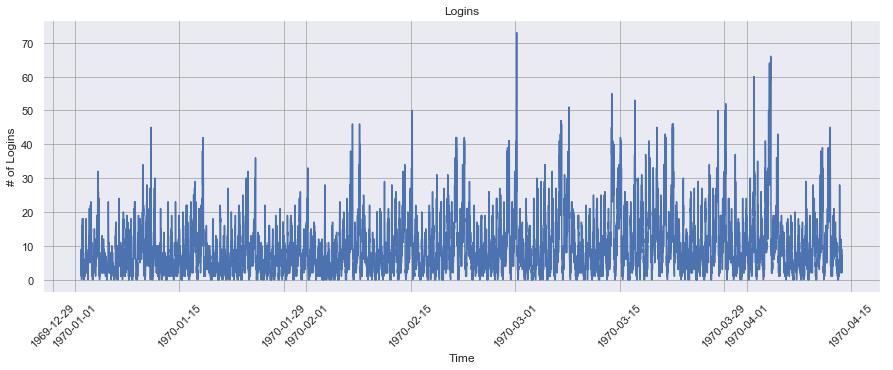

In [9]:
# To plot the frequency count every 15 minutes
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(login_delta15.index, login_delta15.login_count)
plt.tight_layout
plt.xlabel('Time')
plt.ylabel('# of Logins')
plt.title('Logins')
plt.xticks(rotation=45)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.show()

### The graph above shows there's a repeating pattern during the time period. To take a closer look, we analyze the data set by day of the week and hour below.

In [10]:
# To add 'day_of-week' column based on index
df_login['day_of_week'] = df_login.index.weekday_name
df_login.head()

,login_count,day_of_week
login_time,,
1970-01-01 20:13:18,1,Thursday
1970-01-01 20:16:10,1,Thursday
1970-01-01 20:16:37,1,Thursday
1970-01-01 20:16:36,1,Thursday
1970-01-01 20:26:21,1,Thursday


In [11]:
login_day = pd.DataFrame(df_login['day_of_week'].value_counts())
login_day

,day_of_week
Saturday,19377
Sunday,18167
Friday,15208
Thursday,11960
Wednesday,10339
Tuesday,9268
Monday,8823


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

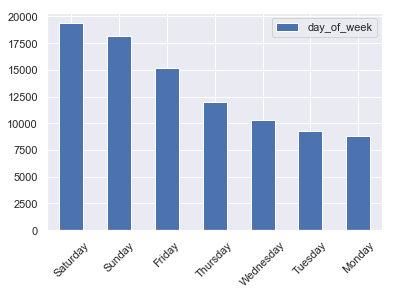

In [12]:
login_day.plot(kind='bar')
plt.xticks(rotation=45)

### The bar chart shows that there are most logins on Sat, Sun and Fri. Weekdays have relatively less logins.

In [13]:
df_login['hour'] = df_login.index.hour
df_login.head()

,login_count,day_of_week,hour
login_time,,,
1970-01-01 20:13:18,1,Thursday,20
1970-01-01 20:16:10,1,Thursday,20
1970-01-01 20:16:37,1,Thursday,20
1970-01-01 20:16:36,1,Thursday,20
1970-01-01 20:26:21,1,Thursday,20


In [14]:
login_hour = df_login.groupby(['hour'], axis=0).sum()
login_hour.head()

,login_count
hour,
0,5993
1,6317
2,5800
3,4831
4,5034


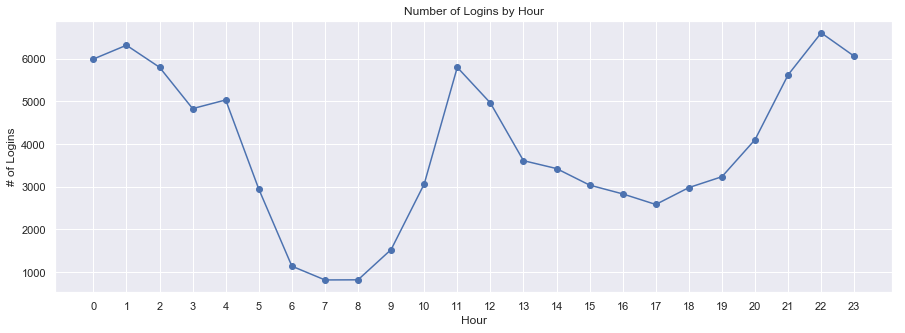

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(login_hour['login_count'], 'o-')
plt.xticks(login_hour.index)
plt.xlabel('Hour')
plt.ylabel('# of Logins')
plt.title('Number of Logins by Hour')
plt.show()

### The chart above shows that the number of logins peak at midnight, noon and 10pm. There're least logins in the morning around 7am and 8am.

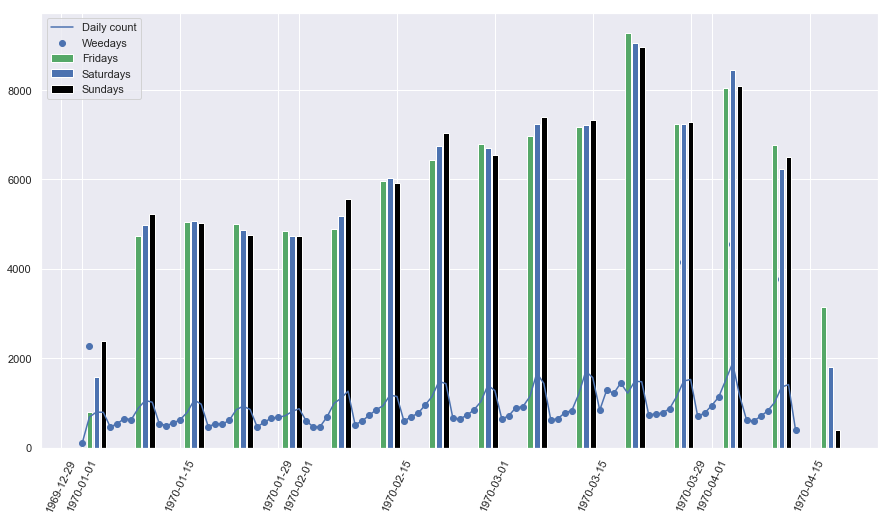

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))
login_daily = df_login.resample('D').sum()
login_bizday = df_login.resample('B').sum()
fri = df_login.resample('W-FRI').sum()
sat = df_login.resample('W-SAT').sum()
sun = df_login.resample('W-SUN').sum()

plt.bar(fri.index, fri.login_count, color='G', label='Fridays')
plt.bar(sat.index, sat.login_count, color='B', label='Saturdays')
plt.bar(sun.index, sun.login_count, color='Black', label='Sundays')

plt.plot(login_daily.index, login_daily.login_count, label='Daily count')
plt.scatter(login_bizday.index, login_bizday.login_count, label='Weedays')
plt.legend(loc='upper left')

plt.xticks(rotation=65)
plt.show()

### The chart confirms that weekends and Fridays have most logins during the week.

In [17]:
df_login.head()



,login_count,day_of_week,hour
login_time,,,
1970-01-01 20:13:18,1,Thursday,20
1970-01-01 20:16:10,1,Thursday,20
1970-01-01 20:16:37,1,Thursday,20
1970-01-01 20:16:36,1,Thursday,20
1970-01-01 20:26:21,1,Thursday,20


In [18]:
login_hd = df_login.groupby(['hour','day_of_week']).sum()
login_hd.head()


login_count
hour day_of_week             
0    Friday               975
     Monday               531
     Saturday            1254
     Sunday              1123
     Thursday             816

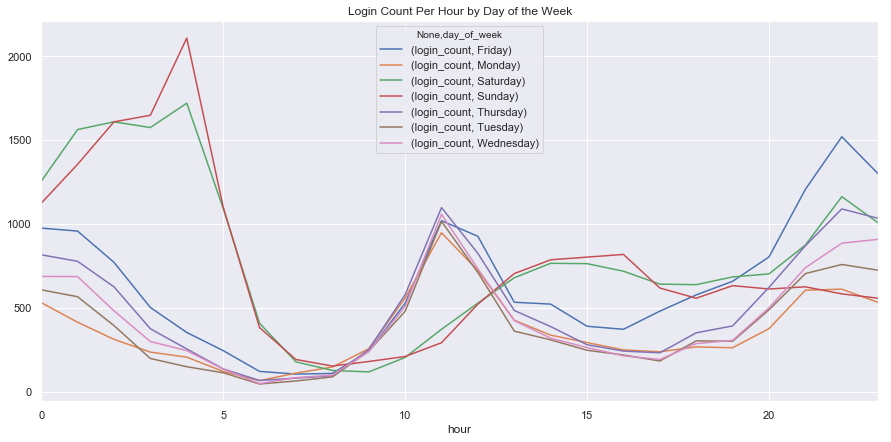

In [19]:
fig, ax = plt.subplots(figsize=(15, 7))
login_hd.unstack().plot(ax=ax)
plt.title('Login Count Per Hour by Day of the Week')
plt.show()

### The graph shows that there are most logins are after midnight, and reaches peak at 4 am, especially early mornings on Sat & Sun. The other 2 peak hours are around 11am  and 9pm. There're least logins at 7-8 am on any day of the week.
# Part 2: Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?


2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    - a. how you will implement the experiment
    - b. what statistical test(s) you will conduct to verify the significance of the observation
    - c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    
<p><b>Answer<p/></b>
    
1. Key Measure of Success: the goal of the experiment is essentially to encourage more activities between 2 cities. Therefore, one key metric is the number of times a driver partner crosses the bridge. To see if reimbursing all toll costs makes driver partners more available in both cities, a second metric we can use is the wait time for each of those trips. Typically, the shorter the wait, the more available the service is. A third metric we can take into consideration is the number of cancellations. Sometimes, a driver would cancel a ride request if a rider is too far or if the driver doesn't want to go to the destination of the rider. To sum up below:
    - Number of bridge crossings each day
    - Average wait time each day
    - Number of cancellations each day
    
    
2. We assume we have all the historical data related to the above metrics. To measure the effectiveness of the proposal, we will randomly select a representative group of driver partners from both cities for reimbursement for a certain period of time, for example 60 days, and conduct hypothesis testing. 
    - Null hypothesis: There's no increase in the number of bridge crossings per day.
    - Alternative hypothesis: There's more bridge crossings per day after the proposed change.
We set the significance level as 5%, and calculate the p-value. If p-value is less than 5%, the null hypothesis can be rejected. We perform the same testing for other 2 metrics. If all results show that the null hypothesis can be rejected, it means the measure achieves its goal.

# Part 3: Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

In [20]:
file = open('ultimate_data_challenge.json', 'r')

df = pd.DataFrame(json.load(file))
file.close()
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [21]:
df.tail()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
49995,5.63,4.2,5.0,1.0,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,False,100.0
49996,0.00,4.0,NaN,1.0,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0
49997,3.86,5.0,5.0,1.0,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,True,100.0
49998,4.58,3.5,3.0,1.0,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0
49999,3.49,5.0,NaN,1.0,Astapor,2014-04-20,Android,2014-01-18,0.0,0,False,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [23]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [24]:
# To see the # of null values
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [25]:
# The ratio of null values in column 'avg_rating_of_driver'
8122/50000

0.16244

The number of null values for column 'avg_rating_by_driver' and 'phone' is immaterial as there are a total of 50,000 observations. The ratio of null values in column 'avg_rating_of_driver' is over 16%, which is relatively high.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [26]:
# We consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. 
# Therefore, we look at the column 'trips_in_first_30_days', and divide the number of rows whose value is 0 by
# total number of users.
retention_rate = len(df[df['trips_in_first_30_days']==0])/len(df['trips_in_first_30_days'])
retention_rate

0.3078

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.


3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

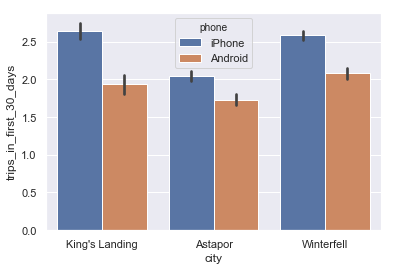

In [27]:
sns.barplot(x='city', y='trips_in_first_30_days', data=df, hue='phone')
plt.show()

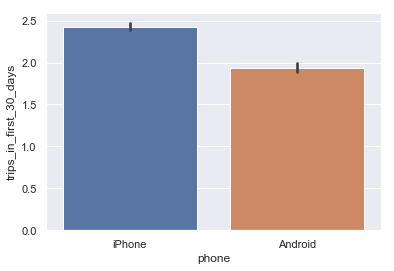

In [28]:
sns.barplot(x='phone', y='trips_in_first_30_days', data=df)
plt.show()

In [29]:
# convert dates to datetime objects
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
print('The earliest sign-up date:',df['signup_date'].min())
print("The lastest sign-up date:", df['signup_date'].max())
print('The earliest last_trip_date:', df['last_trip_date'].min())
print('The latest last_trip_date:', df['last_trip_date'].max())

The earliest sign-up date: 2014-01-01 00:00:00
The lastest sign-up date: 2014-01-31 00:00:00
The earliest last_trip_date: 2014-01-01 00:00:00
The latest last_trip_date: 2014-07-01 00:00:00


We observed above that all the data in the 'sign_up' column is Jan. To predict whether or not a user will be active in their 6th month on the system, we create a column "active" based on 'last_trip_date'. If there's activity in June, we determine the rider is active in the 6th month.

In [57]:
df['active'] = (df['last_trip_date'].dt.month == 6) * 1
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [31]:
# add dummies to categorical data
df_new = pd.get_dummies(df, columns=['city', 'phone'])
df_new.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,True,46.2,1,0,1,0,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,False,50.0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,False,100.0,0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,True,80.0,1,0,1,0,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,False,82.4,0,0,0,1,1,0


In [32]:
df_new.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'last_trip_date', 'signup_date', 'surge_pct', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct', 'active', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'phone_Android',
       'phone_iPhone'],
      dtype='object')

In [33]:
feature_columns = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'city_Astapor',
 "city_King's Landing", 'city_Winterfell', 'phone_Android','phone_iPhone']

In [34]:
from sklearn.model_selection import train_test_split
# define features and target
X = df_new[feature_columns]
y = df_new.active

# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [35]:
# dictionary of parameters to optimize, and the range of optimization values
parameters = {'gamma':[1,2,3], 'min_child_weight':[0,1,2], 'learning_rate': [0.25, 0.2, 0.1], 
              'subsample':[1,0.8], 'scale_pos_weight':[0.95, 0.9], 'max_delta_step':[0,0.05]}

pip install xgboost

In [36]:
from xgboost import XGBClassifier, cv, plot_importance
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# instantiate a classifier
xg_clf = XGBClassifier(objective = 'binary:logistic', random_state = 42, silent = 1, n_estimators=10, max_depth= 8)

# RandomSearch
grid_search = GridSearchCV(param_grid= parameters, estimator = xg_clf, cv=3, scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1, subsample=1,
       verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [1, 2, 3], 'min_child_weight': [0, 1, 2], 'learning_rate': [0.25, 0.2, 0.1], 'subsample': [1, 0.8], 'scale_pos_weight': [0.95, 0.9], 'max_delta_step': [0, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [38]:
# Print best parameters and results
print(grid_search.best_params_)
print(grid_search.best_score_)

{'gamma': 3, 'learning_rate': 0.25, 'max_delta_step': 0, 'min_child_weight': 0, 'scale_pos_weight': 0.9, 'subsample': 0.8}
0.7736


In [39]:
# optimized parameters
optimized_parameters = {'objective':'binary:logistic',
                        'n_estimators': 10,
                        'random_state': 42,
                        'silent': 0,
                        'subsample': 0.8, 
                        'scale_pos_weight': 0.9, 
                        'min_child_weight': 0, 
                        'max_depth': 8, 
                        'max_delta_step': 0, 
                        'learning_rate': 0.25, 
                        'gamma': 3
                       }

In [40]:
# instantiate a classifier
xg_clf_opt = XGBClassifier(**optimized_parameters)
xg_clf_opt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=3, learning_rate=0.25,
       max_delta_step=0, max_depth=8, min_child_weight=0, missing=None,
       n_estimators=10, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=0.9, seed=None, silent=0,
       subsample=0.8, verbosity=1)

In [43]:
# predict the labels
y_opt_pred = xg_clf_opt.predict(X_train)

# score model
score = accuracy_score(y_train, y_opt_pred)
print("The accuracy of the optimized classifier is {}".format(round(score, 5)))

The accuracy of the optimized classifier is 0.79349


In [46]:
# train unoptimized model
xg_clf.fit(X_train, y_train)

y_unopt_pred = xg_clf.predict(X_train)

score_unopt = accuracy_score(y_train, y_unopt_pred)
print("The accuracy of the classifier before optimization is {}".format(round(score_unopt, 5)))

The accuracy of the classifier before optimization is 0.78589


## We can see the the optimized classifier performs better than the one before optimization. The next step is to see how the model performs with the test data.

In [49]:
# predict the labels of test data by using the optimized classifier
y_opt_test = xg_clf_opt.predict(X_test)

# score model
test_score = accuracy_score(y_test, y_opt_test)
print('The accuracy of the optimized classifier for test data is.{}'.format(round(test_score, 5)))

The accuracy of the optimized classifier for test data is.0.772


In [52]:
# predict the labels of test data by using the unoptimized classifier
y_unopt_test = xg_clf.predict(X_test)

# score model
test_score_unopt = accuracy_score(y_test, y_unopt_test)
print('The accuracy of the unoptimized classifier for test data is.{}'.format(round(test_score_unopt, 5)))

The accuracy of the unoptimized classifier for test data is.0.77007


## The result shows that the optimized classifier performs better both in training and test data.

In [54]:
# instantiate a classifier
xg_clf_final = XGBClassifier(objective='binary:logistic', random_state=42, silent=0, n_estimators = 200, max_depth=8)

# train the final model
xg_clf_final.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=0, subsample=1,
       verbosity=1)

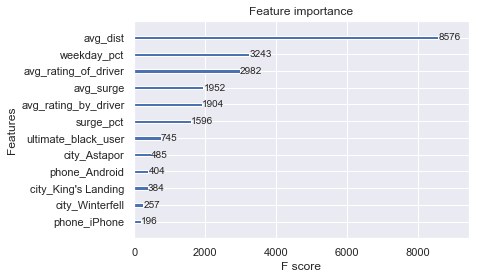

In [56]:
plot_importance(xg_clf_final)

## We observed that the most important feature in rider retention is the average distance in miles per trip taken in the first 30 days after signup. To improve its long-term rider retention, we can choose to offer more promotion in the first 30 days to encourage people take longer trips, and/or take more trips during weekdays. We can also take action to encourage drivers to provide better service to improve customer satisfaction.